In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

In [27]:
# Generate random dataset
np.random.seed(42)
n_samples = 500
y_true = np.random.normal(50, 15, n_samples)
noise = np.random.normal(0, 8, n_samples)
bias = np.random.normal(2, 3, n_samples)
y_pred = y_true + noise + bias

In [28]:
# Regression Metrics Functions
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def calculate_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Calculate all metrics
mae = calculate_mae(y_true, y_pred)
mse = calculate_mse(y_true, y_pred)
rmse = calculate_rmse(y_true, y_pred)
mape = calculate_mape(y_true, y_pred)

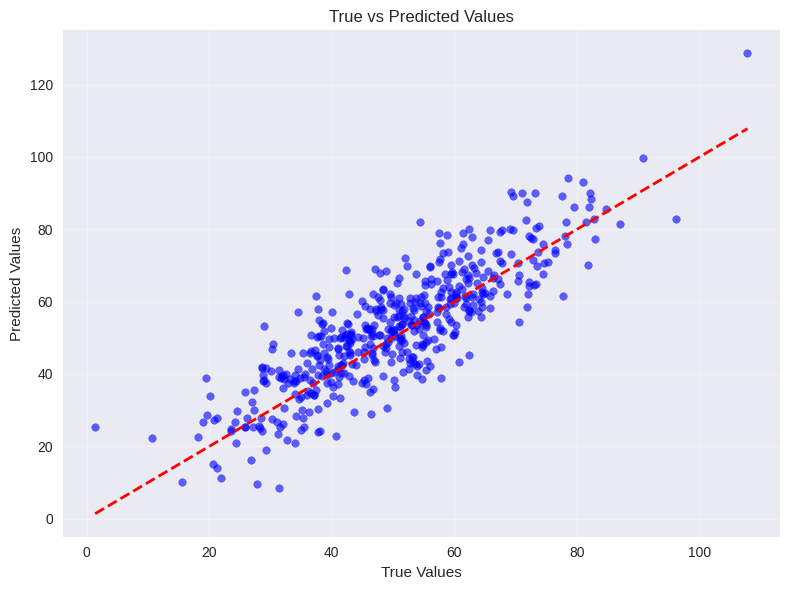

In [29]:
# True vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6, color='blue', s=30)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Training Simulation
def simulate_training_errors(y_true, n_epochs=50):
    np.random.seed(42)
    mae_history, mse_history, rmse_history, mape_history = [], [], [], []
    
    for epoch in range(n_epochs):
        noise_level = 20 * np.exp(-epoch / 15)
        noise = np.random.normal(0, noise_level, len(y_true))
        y_pred_epoch = y_true + noise
        
        mae_history.append(calculate_mae(y_true, y_pred_epoch))
        mse_history.append(calculate_mse(y_true, y_pred_epoch))
        rmse_history.append(calculate_rmse(y_true, y_pred_epoch))
        mape_history.append(calculate_mape(y_true, y_pred_epoch))
    
    return list(range(1, n_epochs+1)), mae_history, mse_history, rmse_history, mape_history

epochs, mae_history, mse_history, rmse_history, mape_history = simulate_training_errors(y_true)

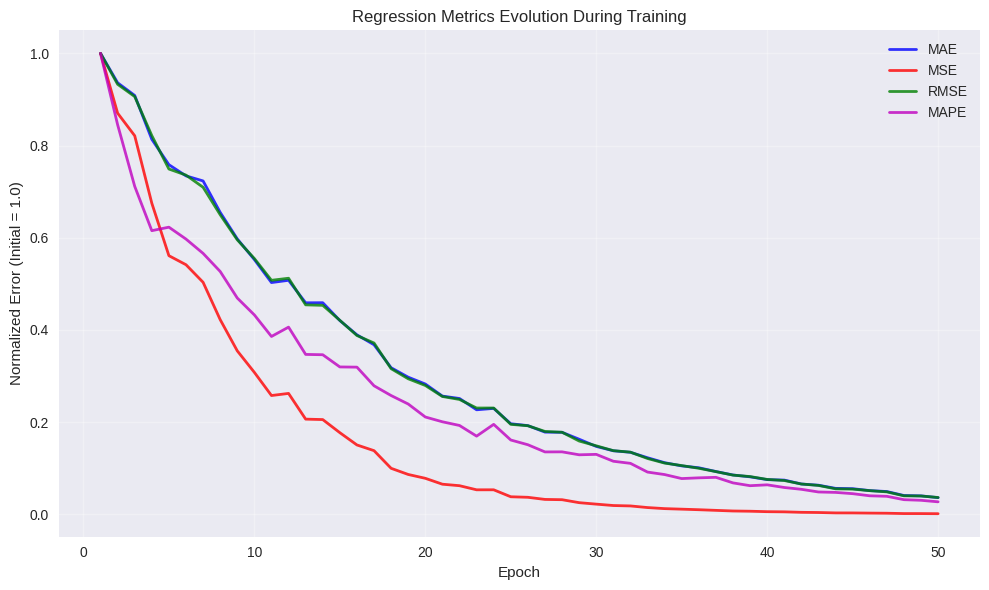

In [31]:
# Metrics Evolution During Training
plt.figure(figsize=(10, 6))

# Normalize metrics for comparison
mae_norm = np.array(mae_history) / mae_history[0]
mse_norm = np.array(mse_history) / mse_history[0]
rmse_norm = np.array(rmse_history) / rmse_history[0]
mape_norm = np.array(mape_history) / mape_history[0]

plt.plot(epochs, mae_norm, 'b-', linewidth=2, label='MAE', alpha=0.8)
plt.plot(epochs, mse_norm, 'r-', linewidth=2, label='MSE', alpha=0.8)
plt.plot(epochs, rmse_norm, 'g-', linewidth=2, label='RMSE', alpha=0.8)
plt.plot(epochs, mape_norm, 'm-', linewidth=2, label='MAPE', alpha=0.8)

plt.title('Regression Metrics Evolution During Training')
plt.xlabel('Epoch')
plt.ylabel('Normalized Error (Initial = 1.0)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

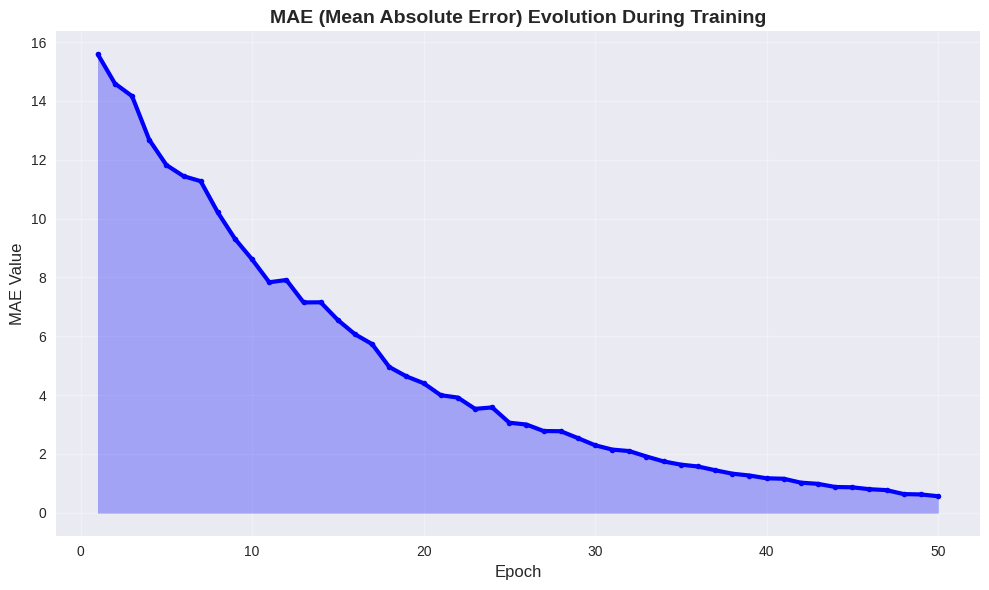

Final MAE: 0.563
Initial MAE: 15.585
Improvement: 96.4%


In [32]:
# Individual Graph for MAE (Mean Absolute Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae_history, 'b-', linewidth=3, marker='o', markersize=4)
plt.title('MAE (Mean Absolute Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, mae_history, alpha=0.3, color='blue')
plt.tight_layout()
plt.show()

print(f"Final MAE: {mae_history[-1]:.3f}")
print(f"Initial MAE: {mae_history[0]:.3f}")
print(f"Improvement: {((mae_history[0] - mae_history[-1]) / mae_history[0] * 100):.1f}%")

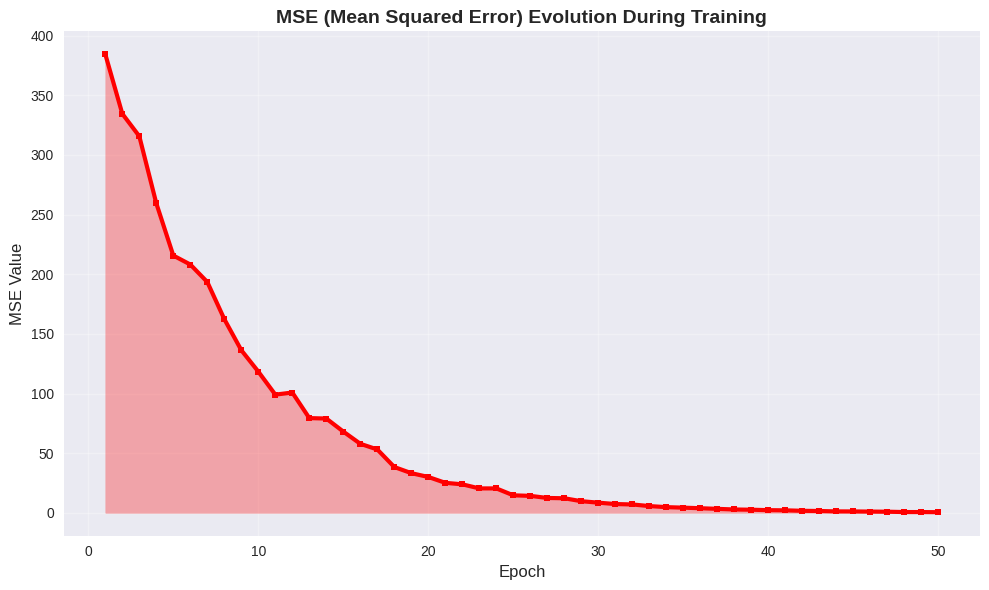

Final MSE: 0.512
Initial MSE: 384.392
Improvement: 99.9%


In [33]:
# Individual Graph for MSE (Mean Squared Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, mse_history, 'r-', linewidth=3, marker='s', markersize=4)
plt.title('MSE (Mean Squared Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, mse_history, alpha=0.3, color='red')
plt.tight_layout()
plt.show()

print(f"Final MSE: {mse_history[-1]:.3f}")
print(f"Initial MSE: {mse_history[0]:.3f}")
print(f"Improvement: {((mse_history[0] - mse_history[-1]) / mse_history[0] * 100):.1f}%")

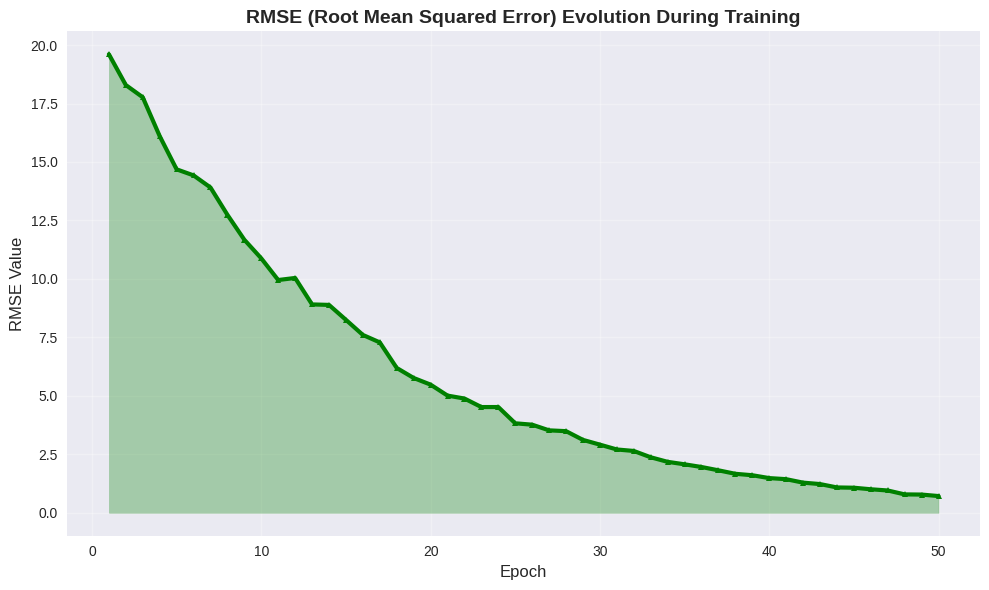

Final RMSE: 0.715
Initial RMSE: 19.606
Improvement: 96.4%


In [34]:
# Individual Graph for RMSE (Root Mean Squared Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, rmse_history, 'g-', linewidth=3, marker='^', markersize=4)
plt.title('RMSE (Root Mean Squared Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('RMSE Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, rmse_history, alpha=0.3, color='green')
plt.tight_layout()
plt.show()

print(f"Final RMSE: {rmse_history[-1]:.3f}")
print(f"Initial RMSE: {rmse_history[0]:.3f}")
print(f"Improvement: {((rmse_history[0] - rmse_history[-1]) / rmse_history[0] * 100):.1f}%")

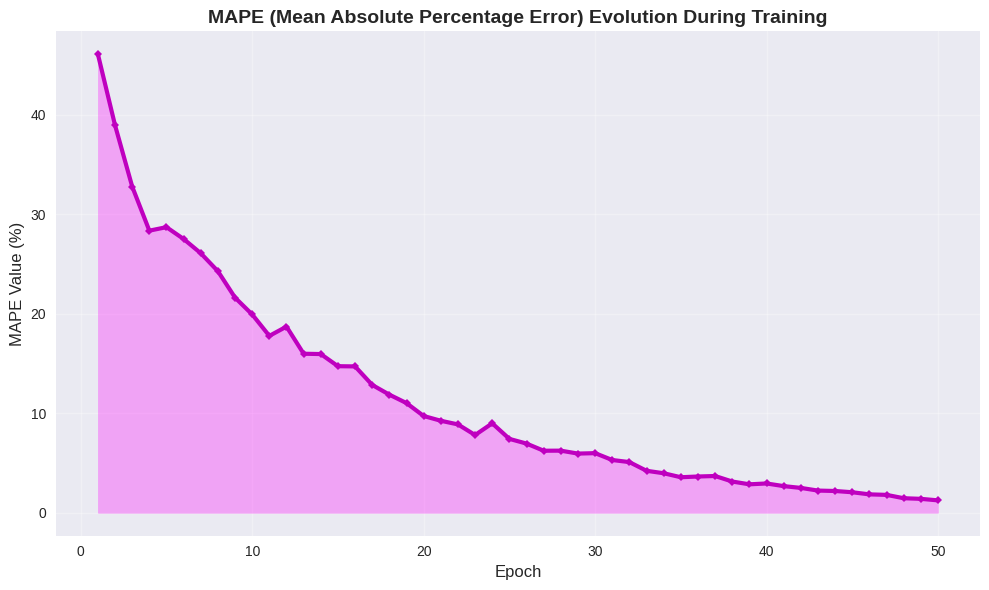

Final MAPE: 1.248%
Initial MAPE: 46.066%
Improvement: 97.3%


In [35]:
# Individual Graph for MAPE (Mean Absolute Percentage Error)
plt.figure(figsize=(10, 6))
plt.plot(epochs, mape_history, 'm-', linewidth=3, marker='D', markersize=4)
plt.title('MAPE (Mean Absolute Percentage Error) Evolution During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAPE Value (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(epochs, mape_history, alpha=0.3, color='magenta')
plt.tight_layout()
plt.show()

print(f"Final MAPE: {mape_history[-1]:.3f}%")
print(f"Initial MAPE: {mape_history[0]:.3f}%")
print(f"Improvement: {((mape_history[0] - mape_history[-1]) / mape_history[0] * 100):.1f}%")